# Jon Williamson

# 425005368

# CSCE 421: Project Winning Percent Models

## Preprocessing




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [12]:
df = pd.read_csv('master_data.csv', index_col=0)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Kromer,2012,45,0,9,0,0,9,0,0,...,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5,0.333333,0
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0,0.218750,-1
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature No.</th>
    <th class="tg-fymr">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-0pky">Age at hiring</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-0pky">Number of times previously hired as head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-0pky">Number of years’ experience as college position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-0pky">Number of years’ experience as college coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5</td>
    <td class="tg-0pky">Number of years’ experience as college head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">6</td>
    <td class="tg-0pky">Number of years’ experience as NFL position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">7</td>
    <td class="tg-0pky">Number of years’ experience as NFL coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8</td>
    <td class="tg-0pky">Number of years’ experience as NFL head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">9</td>
    <td class="tg-0pky">Demotion presence in hiring history</td>
  </tr>
  <tr>
    <td class="tg-c3ow">10</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">11</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">12</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized giveaway rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">13</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">14</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">15</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized turnover rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">16</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized yardage differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">17</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized point differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">18</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized turnover ratio rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">19</td>
    <td class="tg-0pky">Hiring team’s average winning percentage in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">20</td>
    <td class="tg-0pky">Hiring team’s average normalized turnover ratio rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">21</td>
    <td class="tg-0pky">Hiring team’s average normalized point differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">22</td>
    <td class="tg-0pky">Hiring team’s average normalized yard differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">23</td>
    <td class="tg-0pky">Hiring team’s average divisional placement in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">24</td>
    <td class="tg-0pky">Hiring team’s number of playoff appearances in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">25</td>
    <td class="tg-0pky">Hiring team’s number of playoff wins in previous two years</td>
  </tr>
</tbody>
</table>

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because coaches are rarely an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 10-18 and 20-23 were normalized based on the number of teams in the rank. Each of these features' original forms was of $x \text{ out of }z$, where $x$ is the rank of the attribute by team out of $z$ total teams. In order to convert this rank to a normalized value, the following equation was used:
$$
f(x,z) = \frac{z-x}{z-1}
$$
This equation linearly distributes score from 1 at the best rank to 0 at the worst rank. For example, a team that places 2nd out of 4 teams in their division is assigned the following score for a single instance of their divisional performance:
$$
f(2,4) = \frac{4-2}{4-1}\\
f(2,4) = \frac{2}{3}\\
f(2,4) \approx .667
$$
This normalization should roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

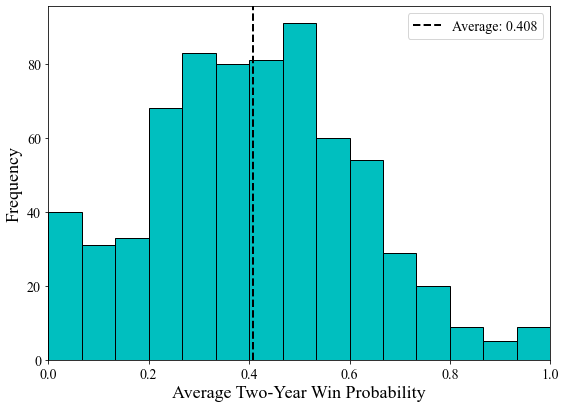

In [16]:
rcParams['figure.figsize'] = 9, 6.5
raw_win_pct = df['Avg 2Y Win Pct'].values.T
raw_win_pct_mean = np.mean(raw_win_pct)
plt.hist(raw_win_pct, bins=15, color='c', edgecolor='k')
plt.axvline(raw_win_pct_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(raw_win_pct_mean))
plt.xlim(0,1)
plt.xlabel('Average Two-Year Win Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Another consideration, although not analyzed in the model, is the change in the average 2Y winning percentage for each team based on the HC hire. Feature 19 is the hiring team's average percentage prior to the hire. Thus, subtracting this feature from the aforementioned label yields an improvement in winning percentage.

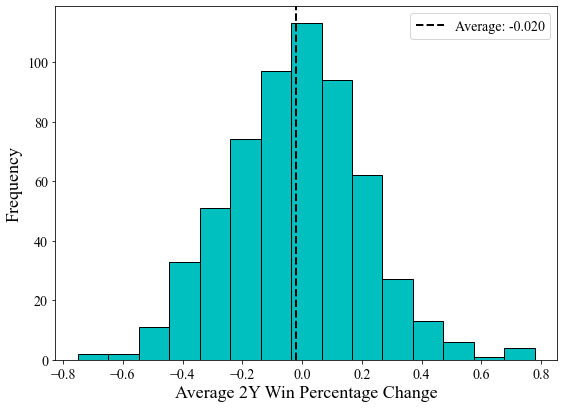

In [18]:
prev_win_pct = df['Feature 19'].values.T
win_pct_improvement = raw_win_pct - prev_win_pct
win_pct_improvement = win_pct_improvement[~np.isnan(win_pct_improvement)]
win_pct_improvement_mean = np.mean(win_pct_improvement)
plt.hist(win_pct_improvement, bins=15, color='c', edgecolor='k')
plt.axvline(win_pct_improvement_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(win_pct_improvement_mean))
#plt.xlim(0,1)
plt.xlabel('Average 2Y Win Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
X = df.iloc[:,2:-2]
y = df.iloc[:,-2]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25
0,45,0,9,0,0,9,0,0,0,NaN,...,NaN,NaN,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5
1,47,0,0,0,0,12,0,0,0,NaN,...,NaN,NaN,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0
2,38,0,0,0,0,5,3,0,0,0.752688,...,NaN,NaN,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0
3,41,1,0,0,0,5,3,3,0,0.752688,...,0.129032,0.139785,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0
4,44,0,8,0,12,0,0,0,0,NaN,...,NaN,NaN,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0


In [22]:
y.head(5)

0    0.333333
1    0.267857
2    0.500000
3    0.218750
4    0.745455
Name: Avg 2Y Win Pct, dtype: float64

In [24]:
y.shape

(693,)

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The 3x3 white boxes in the matrix show that the correlation between Features 10-12 and 13-15 have no correlation. This is expected, as Features 10-12 are based on performance as an offensive coordinator, while features 13-15 are from performance as a defensive coordinator. No coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

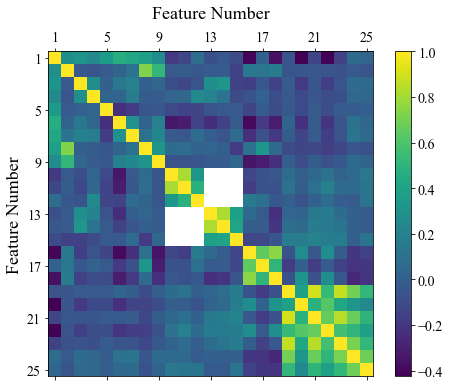

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-370)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, random_state=0)

## Model 1: Linear Regression with Lasso Regularization

Necessary Imports:

In [30]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [32]:
result_dict = { 'alpha_':       [],
                'coef_':        [],
                'train_score':     [],
                'test_score':    [],
                'alphas_':      [],
                'mse_path_':    [],
                'intercept_':   []
}

num_of_folds = 10
max_iter = 1e6

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = LassoCV(eps=1e-5, n_alphas=1000, max_iter=max_iter, verbose=True).fit(X_train__, y_train_)
    result_dict['alpha_'].append(model.alpha_)
    result_dict['intercept_'].append(model.intercept_)
    result_dict['coef_'].append(model.coef_)
    result_dict['alphas_'].append(model.alphas_)
    result_dict['mse_path_'].append(model.mse_path_)
    result_dict['test_score'].append(mean_squared_error(y_test_, model.predict(X_test__)))
    result_dict['train_score'].append(mean_squared_error(y_train_, model.predict(X_train__)))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Thew following graph shows the convergence of the mse in the internal cross-validation.

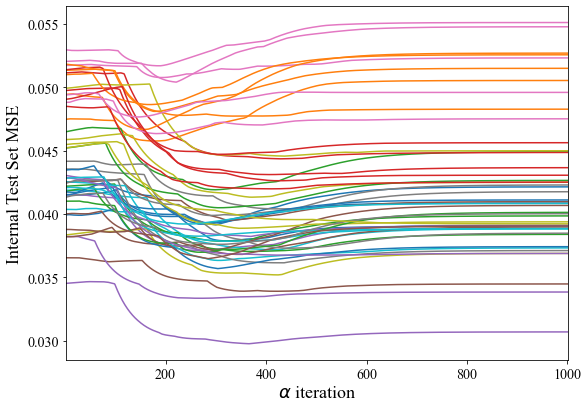

In [34]:
list_length = 0
for mse_list in result_dict['mse_path_']:
    list_length = len(mse_list)
    plt.plot(np.arange(1, list_length + 1), mse_list)
plt.xlim(1, list_length + 1)
plt.xlabel(R'$\alpha$' + ' iteration')
plt.ylabel('Internal Test Set MSE')
plt.show()

The following code prints the average mean squared error value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient, also including the intercept for the model. 

In [36]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(result_dict['train_score'])), np.sqrt(np.mean(result_dict['test_score']))))

Average Train RMSE: 0.197
Average Test RMSE: 0.204


In [38]:
print('Average Best Alpha: {:.3f}'.format(np.mean(result_dict['alpha_'])))

Average Best Alpha: 0.001


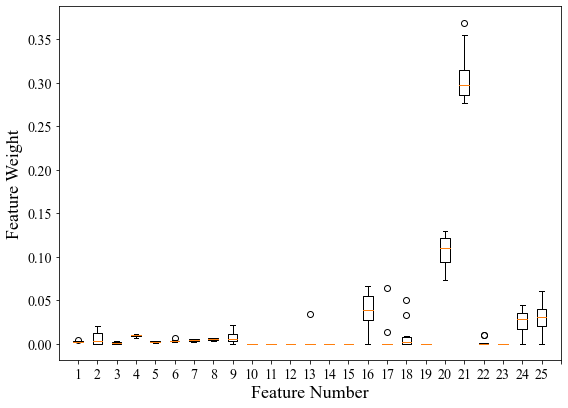

In [40]:
#rcParams['figure.figsize'] = 12, 8
coef_list = [np.abs(l) for l in zip(*result_dict['coef_'])]
label_list = [item.split()[-1] for item in X.columns.values]
label_list.append("")
plt.boxplot(coef_list)
plt.xlim(0, len(coef_list))
plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
plt.xlabel('Feature Number')
plt.ylabel('Feature Weight')
plt.show()

In [42]:
feature_name_dict = {
    "1":    "Age at hiring",
    "2":    "Number of times previously hired as head coach",
    "3":    "Number of years’ experience as college position coach",
    "4":    "Number of years’ experience as college coordinator",
    "5":    "Number of years’ experience as college head coach",
    "6":    "Number of years’ experience as NFL position coach",
    "7":    "Number of years’ experience as NFL coordinator",
    "8":    "Number of years’ experience as NFL head coach",
    "9":    "Demotion presence in hiring history",
    "10":   "During years as NFL OC, team’s average normalized yardage rank",
    "11":   "During years as NFL OC, team’s average normalized point rank",
    "12":   "During years as NFL OC, team’s average normalized giveaway rank",
    "13":   "During years as NFL DC, team’s average normalized yardage rank",
    "14":   "During years as NFL DC, team’s average normalized point rank",
    "15":   "During years as NFL DC, team’s average normalized turnover rank",
    "16":   "During years as NFL HC, team’s average normalized yardage differential rank",
    "17":   "During years as NFL HC, team’s average normalized point differential rank",
    "18":   "During years as NFL HC, team’s average normalized turnover ratio rank",
    "19":   "Hiring team’s average winning percentage in previous two years",
    "20":   "Hiring team’s average normalized turnover ratio rank in previous two years",
    "21":   "Hiring team’s average normalized point differential rank in previous two years",
    "22":   "Hiring team’s average normalized yard differential rank in previous two years",
    "23":   "Hiring team’s average divisional placement in previous two years",
    "24":   "Hiring team’s number of playoff appearances in previous two years",
    "25":   "Hiring team’s number of playoff wins in previous two years"
}

In [44]:
feature_avg_weight_dict = dict(zip(label_list[:-1], [np.mean(l) for l in zip(coef_list)]))
feature_std_weight_dict = dict(zip(label_list[:-1], [np.std(l) for l in zip(coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: Hiring team’s average normalized point differential rank in previous two years (21), has an avg. importance of 0.3071 with a std. dev. of 0.0306.
Rank  2: Hiring team’s average normalized turnover ratio rank in previous two years (20), has an avg. importance of 0.1067 with a std. dev. of 0.0169.
Rank  3: During years as NFL HC, team’s average normalized yardage differential rank (16), has an avg. importance of 0.0362 with a std. dev. of 0.0220.
Rank  4: Hiring team’s number of playoff wins in previous two years (25), has an avg. importance of 0.0308 with a std. dev. of 0.0157.
Rank  5: Hiring team’s number of playoff appearances in previous two years (24), has an avg. importance of 0.0243 with a std. dev. of 0.0147.
Rank  6: During years as NFL HC, team’s average normalized turnover ratio rank (18), has an avg. importance of 0.0102 with a std. dev. of 0.0163.
Rank  7: Number of years’ experience as college coordinator (4), has an avg. importance of 0.0092 with a std. dev. of 0

In [46]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(result_dict['train_score'])), np.sqrt(np.mean(result_dict['test_score']))))

Average Train RMSE: 0.197
Average Test RMSE: 0.204


In [48]:
from sklearn.linear_model import Lasso
plot_pred = None
model = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    model = Lasso(alpha=np.mean(result_dict['alpha_'])).fit(X_train__, y_train)
    plot_pred = model.predict(X_test__)

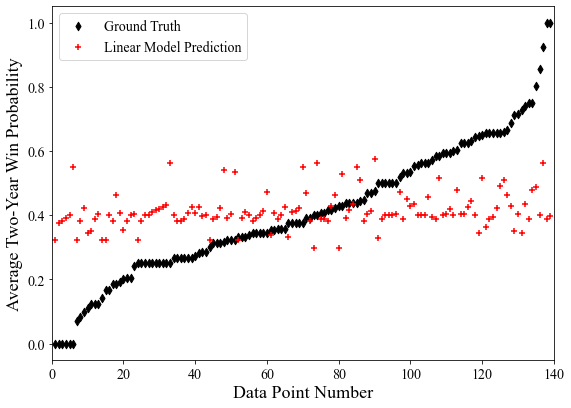

In [50]:
rcParams['figure.figsize'] = 9, 6.5
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(1, len(sorted_y_test) + 1), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(1, len(sorted_plot_pred) + 1), sorted_plot_pred, marker='+', color='r', label='Linear Model Prediction')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.legend()
plt.show()

In [52]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))
print('RMSE when predicting the mean: {:.3f}'.format(np.sqrt(np.mean((np.mean(sorted_y_test) - sorted_y_test) ** 2))))

Average RMSE: 0.204
RMSE when predicting the mean: 0.208


These results show that the regularized linear regression, on average, predicts the winning percent of coaching hires over their first two years within 20%. This is equivalent to 3 games in a 16 game season. Although the result of this model is surprising, it is likely that a standard regression with regularization is not sufficient to model the complex nature of this data given that its predictions center closely on the expected winning percentage. 

## Model 2: XGBoost Regressor

Necessary Imports:

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [56]:

xgbr_param_dict = {
    "n_estimators":     [1, 5, 10, 20, 50, 100],
    "learning_rate":    [.01, .05, .1, .15, .2, .25, .3],
    "max_depth":        [2, 4, 6, 8, 10, 12],
    "gamma":            [0, .01, .05, .1],
    "alpha":            [0, .01, .05, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [5, 10, 20],
    "learning_rate":    [.1, .5],
}
"""
xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

num_of_folds=10

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBRegressor(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    xgbr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    xgbr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9992 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 12200 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 14988 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 17488 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 20160 out 

In [58]:
xgbr_best_params_dict

{'n_estimators': [100, 20, 10, 50, 50, 100, 100, 20, 100, 10],
 'learning_rate': [0.2, 0.1, 0.15, 0.1, 0.05, 0.05, 0.05, 0.2, 0.05, 0.15],
 'max_depth': [12, 12, 8, 6, 4, 12, 6, 2, 6, 4],
 'gamma': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'alpha': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

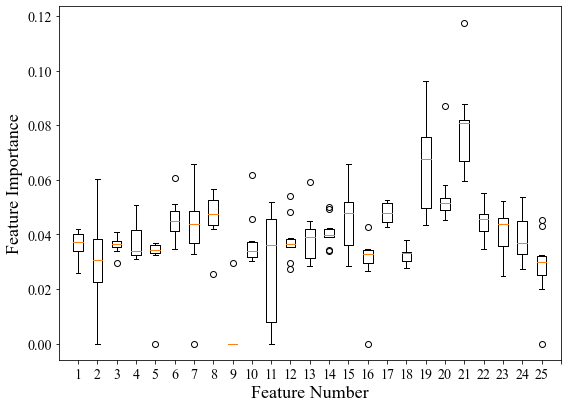

In [60]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
plt.xlim(0, len(label_list))
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [62]:
feature_avg_weight_dict = dict(zip(label_list[0:-1], [np.mean(l) for l in zip(xgbr_coef_list)]))
feature_std_weight_dict = dict(zip(label_list[0:-1], [np.std(l) for l in zip(xgbr_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: Hiring team’s average normalized point differential rank in previous two years (21), has an avg. importance of 0.0790 with a std. dev. of 0.0160.
Rank  2: Hiring team’s average winning percentage in previous two years (19), has an avg. importance of 0.0654 with a std. dev. of 0.0166.
Rank  3: Hiring team’s average normalized turnover ratio rank in previous two years (20), has an avg. importance of 0.0546 with a std. dev. of 0.0114.
Rank  4: During years as NFL HC, team’s average normalized point differential rank (17), has an avg. importance of 0.0479 with a std. dev. of 0.0037.
Rank  5: Number of years’ experience as NFL head coach (8), has an avg. importance of 0.0466 with a std. dev. of 0.0084.
Rank  6: During years as NFL DC, team’s average normalized turnover rank (15), has an avg. importance of 0.0459 with a std. dev. of 0.0120.
Rank  7: Number of years’ experience as NFL position coach (6), has an avg. importance of 0.0454 with a std. dev. of 0.0068.
Rank  8: Hiring tea

In [64]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(xgbr_result_dict['train_score'])), np.sqrt(np.mean(xgbr_result_dict['test_score']))))

Average Train RMSE: 0.153
Average Test RMSE: 0.208


The previously printed RMSE values show that the heavily cross-validated XGBoost does not have a better performance on the testing set than the regularized linear regression. It does, hoowever, show an increased performance on the testing set. This result is surprising, and suggests that the features selected for this model may not be sufficient to accurately predict a team's winning percentage in the first two years following a head coach hire. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [66]:
plot_pred = None
xgbr = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    print(test_xgbr_best_params_dict)
    test_xgbr_best_params_dict.update(default_xgbr_params)
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBRegressor(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 6, 'gamma': 0.1, 'alpha': 0}


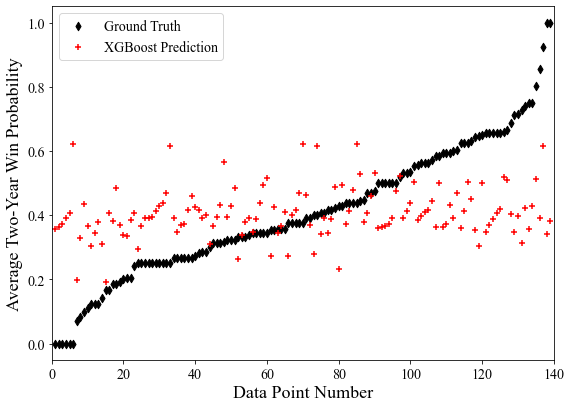

In [68]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(1, len(sorted_y_test) + 1), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(1, len(sorted_plot_pred) + 1), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.legend()
plt.show()

In [70]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))

Average RMSE: 0.211


The previous plot shows that the XGBoost model most often predicts the expected value of the winning percentage. Although this result is disappointing, the model's feature importance does provide some useful takeaways. These takeaways will be discussed in more detail in the final report. 

## Model 3: MLPRegressor

Necessary Imports:

In [72]:
from sklearn.neural_network import MLPRegressor

In [74]:

mlpr_param_dict = {
    "alpha":                [0, .0001, .001, .01],
    "hidden_layer_sizes":   [(100,), (50, 25), (50, 25, 15, 9)],
    "max_iter":             [200, 400, 600],
    "tol":                  [1e-4, 1e-5]
}
"""
mlpr_param_dict = {
    "alpha":                [0, .0001, .001],
    "hidden_layer_sizes":   [(19, 11, 7, 5, 3), (23, 19, 15, 11, 5)],
}
"""
mlpr_best_params_dict = {key: [] for key in mlpr_param_dict.keys()}

mlpr_result_dict = {    'train_score':  [],
                        'test_score':   []
}

default_mlpr_params = {
    "activation":   'relu',
    'solver':       'lbfgs'
}

num_of_folds=10

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPRegressor(**default_mlpr_params), param_grid=mlpr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    #xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    mlpr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    mlpr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   58.5s finished
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   59.8s finishe

In [76]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(mlpr_result_dict['train_score'])), np.sqrt(np.mean(mlpr_result_dict['test_score']))))

Average Train RMSE: 0.193
Average Test RMSE: 0.210


In [78]:
mlpr_best_params_dict

{'alpha': [0, 0.001, 0.001, 0.01, 0.001, 0.0001, 0, 0.001, 0.01, 0.01],
 'hidden_layer_sizes': [(100,),
  (50, 25),
  (100,),
  (100,),
  (100,),
  (100,),
  (50, 25),
  (100,),
  (100,),
  (50, 25)],
 'max_iter': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
 'tol': [1e-05,
  1e-05,
  1e-05,
  1e-05,
  0.0001,
  0.0001,
  1e-05,
  0.0001,
  0.0001,
  0.0001]}

In [80]:
test_mlpr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in mlpr_best_params_dict.items()}
print(test_mlpr_best_params_dict)
test_mlpr_best_params_dict.update(default_mlpr_params)
mean_imputer    = SimpleImputer()
imputed_X_train = mean_imputer.fit_transform(X_train)
imputed_X_test  = mean_imputer.transform(X_test)
mlpr = MLPRegressor(**test_mlpr_best_params_dict).fit(imputed_X_train, y_train)
plot_pred = mlpr.predict(imputed_X_test)

{'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'tol': 1e-05}


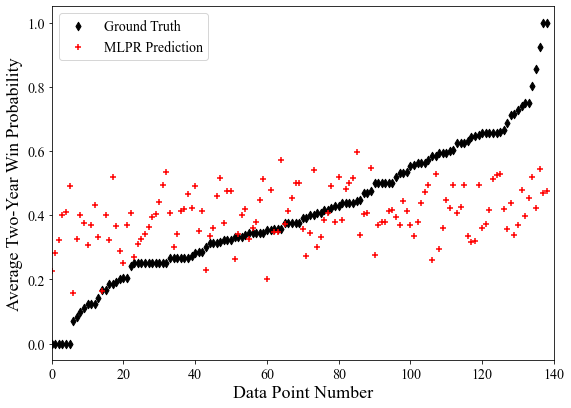

In [81]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='MLPR Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [82]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))
print('RMSE when predicting the mean: {:.3f}'.format(np.sqrt(np.mean((np.mean(sorted_y_test) - sorted_y_test) ** 2))))

Average RMSE: 0.200
RMSE when predicting the mean: 0.208


Unlike XGBoost and Linear Regression, MLP do not have a standard, quick way to understand feature importances. In order to combat this, we use LIME to estimate feature importances over the entire test set via data perturbation. The following code shows one example of an estimate for a random point in the test set. The display shows which features matter, in a positive and negative manner.

In [83]:
import lime
import lime.lime_tabular

In [84]:
explainer = lime.lime_tabular.LimeTabularExplainer(imputed_X_train, 
                                                   feature_names=list(X.columns.values), 
                                                   verbose=False, mode='regression')
random_index = np.random.randint(0, len(imputed_X_test))
exp = explainer.explain_instance(imputed_X_test[i], mlpr.predict)
exp.show_in_notebook(show_table=True)

The following code loops through all data points in the held-out test set.

In [85]:
mlpr_importance_dict = {key: [] for key in feature_name_dict.keys() }

for i in np.arange(0, len(imputed_X_test)):
    print('Estimating feature importance for point {}'.format(i + 1))
    exp = explainer.explain_instance(imputed_X_test[i], mlpr.predict)
    for tuple_ in exp.as_list():
        label, weight = tuple_
        start_index = label.find('Feature')
        feature = label[start_index:start_index + 10].strip().split()[-1]
        mlpr_importance_dict[feature].append(float(weight))

Estimating feature importance for point 1
Estimating feature importance for point 2
Estimating feature importance for point 3
Estimating feature importance for point 4
Estimating feature importance for point 5
Estimating feature importance for point 6
Estimating feature importance for point 7
Estimating feature importance for point 8
Estimating feature importance for point 9
Estimating feature importance for point 10
Estimating feature importance for point 11
Estimating feature importance for point 12
Estimating feature importance for point 13
Estimating feature importance for point 14
Estimating feature importance for point 15
Estimating feature importance for point 16
Estimating feature importance for point 17
Estimating feature importance for point 18
Estimating feature importance for point 19
Estimating feature importance for point 20
Estimating feature importance for point 21
Estimating feature importance for point 22
Estimating feature importance for point 23
Estimating feature i

In [86]:
mlpr_coef_list = [l for l in mlpr_importance_dict.values()]

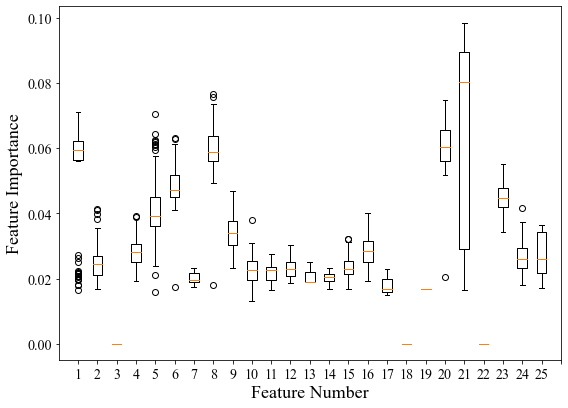

In [87]:
mlpr_coef_list  = [np.abs(l) if l != [] else 0 for l in mlpr_importance_dict.values()]
plt.boxplot(mlpr_coef_list)
plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
plt.xlim(0, len(label_list))
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [88]:
feature_avg_weight_dict = dict(zip(label_list[0:-1], [np.mean(l) for l in zip(mlpr_coef_list)]))
feature_std_weight_dict = dict(zip(label_list[0:-1], [np.std(l) for l in zip(mlpr_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: Hiring team’s average normalized point differential rank in previous two years (21), has an avg. importance of 0.0685 with a std. dev. of 0.0281.
Rank  2: Hiring team’s average normalized turnover ratio rank in previous two years (20), has an avg. importance of 0.0606 with a std. dev. of 0.0073.
Rank  3: Number of years’ experience as NFL head coach (8), has an avg. importance of 0.0599 with a std. dev. of 0.0067.
Rank  4: Age at hiring (1), has an avg. importance of 0.0524 with a std. dev. of 0.0170.
Rank  5: Number of years’ experience as NFL position coach (6), has an avg. importance of 0.0487 with a std. dev. of 0.0063.
Rank  6: Hiring team’s average divisional placement in previous two years (23), has an avg. importance of 0.0450 with a std. dev. of 0.0046.
Rank  7: Number of years’ experience as college head coach (5), has an avg. importance of 0.0416 with a std. dev. of 0.0090.
Rank  8: Demotion presence in hiring history (9), has an avg. importance of 0.0340 with a std

The Neural Network performs better on the test set than either of the previous two models. This result is suprising. Nonetheless, the previous weights provide valuable insight into the decision making process of the network. The poor performance of all models on the held out test set and the large amount of cross validation suggest that these features are not sufficient to predict the winning percentage of teams based primarily on characteristics of the head coach. 